# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress
import pprint as pp
from datetime import date

analysis_date = date.today().strftime("%m/%d/%y")

# Import API key
from api_keys import weather_api_key
units = 'imperial'

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [2]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

611

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [3]:
print("""
Beginning Data Retrieval
-----------------------------
    """)
#set iterators for sets and records. there will be ten sets of fifty records to process.
s = 1
r = 0

#create lists for saving output
found_cities = []
lats = []
lngs = []
max_temps = []
humidities = []
cloudiness = []
wind_speeds = []
countries = []
dates = []

#begin iterating through city list
for city in cities:

    
    # query api for city
    url = f'http://api.openweathermap.org/data/2.5/weather?q={city}&appid={weather_api_key}&units={units}'
    response_json = requests.get(url).json()
#     pp.pprint(response_json)
    raw_df = response_json
#     pp.pprint(raw_df)
    
    
    try:
        # save name, lat, long, max temp, humidity, cloudiness, wind speed, country, and date for each city
        
        lats.append(raw_df['coord']['lat'])
        lngs.append(raw_df['coord']['lon'])
        max_temps.append(raw_df['main']['temp_max'])        
        humidities.append(raw_df['main']['humidity'])
        cloudiness.append(raw_df['clouds']['all'])
        wind_speeds.append(raw_df['wind']['speed'])
        countries.append(raw_df['sys']['country'])
        dates.append(raw_df['dt'])
        found_cities.append(city)
        
        #check if 50 records have been processed and move to the next batch
        if (r + 1) == 51:
            r = 1
            s += 1
        else: 
            r += 1

        print(f'Processing Record {r} of Set {s} | {city}')
        
    except KeyError:
        
        print("City not found. Skipping...")     
        
print("""
-----------------------------
Data Retrieval Complete
-----------------------------
    """)


Beginning Data Retrieval
-----------------------------
    
Processing Record 1 of Set 1 | port alfred
Processing Record 2 of Set 1 | krasnyy chikoy
Processing Record 3 of Set 1 | uyar
Processing Record 4 of Set 1 | ushuaia
Processing Record 5 of Set 1 | gorontalo
Processing Record 6 of Set 1 | cape town
City not found. Skipping...
City not found. Skipping...
Processing Record 7 of Set 1 | coquimbo
City not found. Skipping...
Processing Record 8 of Set 1 | busselton
Processing Record 9 of Set 1 | thompson
Processing Record 10 of Set 1 | hami
City not found. Skipping...
Processing Record 11 of Set 1 | rikitea
Processing Record 12 of Set 1 | saint george
Processing Record 13 of Set 1 | kaitangata
City not found. Skipping...
Processing Record 14 of Set 1 | albany
Processing Record 15 of Set 1 | ambilobe
Processing Record 16 of Set 1 | rosarito
Processing Record 17 of Set 1 | georgetown
Processing Record 18 of Set 1 | bloomington
Processing Record 19 of Set 1 | tuktoyaktuk
Processing Reco

Processing Record 36 of Set 4 | sao filipe
Processing Record 37 of Set 4 | ancud
Processing Record 38 of Set 4 | otjiwarongo
Processing Record 39 of Set 4 | glendive
Processing Record 40 of Set 4 | san francisco
Processing Record 41 of Set 4 | necochea
Processing Record 42 of Set 4 | weligama
Processing Record 43 of Set 4 | vila velha
Processing Record 44 of Set 4 | sainte-claire
Processing Record 45 of Set 4 | jacksonville
Processing Record 46 of Set 4 | khatanga
Processing Record 47 of Set 4 | hambantota
Processing Record 48 of Set 4 | narsaq
Processing Record 49 of Set 4 | hithadhoo
Processing Record 50 of Set 4 | north branch
Processing Record 1 of Set 5 | avarua
Processing Record 2 of Set 5 | yaan
Processing Record 3 of Set 5 | beloha
Processing Record 4 of Set 5 | poum
City not found. Skipping...
Processing Record 5 of Set 5 | itacare
Processing Record 6 of Set 5 | bulungu
Processing Record 7 of Set 5 | sambava
Processing Record 8 of Set 5 | north bend
Processing Record 9 of Set 

Processing Record 23 of Set 8 | panama city
Processing Record 24 of Set 8 | dunedin
Processing Record 25 of Set 8 | calamar
Processing Record 26 of Set 8 | qaqortoq
City not found. Skipping...
Processing Record 27 of Set 8 | jutai
Processing Record 28 of Set 8 | les cayes
City not found. Skipping...
Processing Record 29 of Set 8 | alta floresta
Processing Record 30 of Set 8 | mandal
Processing Record 31 of Set 8 | kodar
Processing Record 32 of Set 8 | lorengau
Processing Record 33 of Set 8 | pangnirtung
Processing Record 34 of Set 8 | fort saint james
Processing Record 35 of Set 8 | teguldet
Processing Record 36 of Set 8 | meulaboh
Processing Record 37 of Set 8 | san cristobal
Processing Record 38 of Set 8 | pyshchug
Processing Record 39 of Set 8 | mount isa
Processing Record 40 of Set 8 | jian
Processing Record 41 of Set 8 | santa cruz
Processing Record 42 of Set 8 | korla
Processing Record 43 of Set 8 | gamba
Processing Record 44 of Set 8 | santa ana
Processing Record 45 of Set 8 | m

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [4]:
#check lengths of arrays
print(f'''
cities: {len(cities)}
found_cities: {len(found_cities)}
lats: {len(lats)}
longs: {len(lngs)}
temps: {len(max_temps)}
humidities: {len(humidities)}
clouds: {len(cloudiness)}
speeds: {len(wind_speeds)}
countries: {len(countries)}
dates: {len(dates)}
''')

#prepare dict for dataframe from lists created with api
prep_df = {
    'City':found_cities,
    'Lat':lats,
    'Lng':lngs,
    'Max Temp':max_temps,
    'Humidity':humidities,
    'Cloudiness':cloudiness,
    'Wind Speed':wind_speeds, 
    'Country':countries,
    'Date':dates
}

#create dataframe
city_data = pd.DataFrame(prep_df)

#export to csv
city_data.to_csv(output_data_file, index_label='City ID')
city_data.head()


cities: 611
found_cities: 559
lats: 559
longs: 559
temps: 559
humidities: 559
clouds: 559
speeds: 559
countries: 559
dates: 559



,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,port alfred,-33.5906,26.8910,64.00,88,75,4.00,ZA,1612756408
1,krasnyy chikoy,50.3643,108.7512,15.53,90,41,0.58,RU,1612756483
2,uyar,55.8100,94.3153,29.43,97,100,12.57,RU,1612756483
3,ushuaia,-54.8000,-68.3000,51.80,87,75,5.75,AR,1612756288
4,gorontalo,0.5412,123.0595,88.83,58,99,3.42,ID,1612756483


In [5]:
### change this later so it uses the data created from the api.

# city_csv = output_data_file
# city_data = pd.read_csv(city_csv)
# city_data.head()

# describe city_data
city_data.describe()

,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Date
count,559.000000,559.000000,559.000000,559.000000,559.000000,559.000000,5.590000e+02
mean,19.715590,13.529192,48.162701,73.245081,52.670841,8.195510,1.612757e+09
std,33.593116,90.357738,32.444635,19.197120,39.354137,6.044869,8.204232e+01
min,-54.800000,-179.166700,-40.000000,11.000000,0.000000,0.110000,1.612756e+09
25%,-7.961400,-66.603550,27.960000,64.000000,12.000000,3.440000,1.612756e+09
50%,22.566700,15.793200,59.000000,77.000000,54.000000,6.910000,1.612757e+09
75%,48.308300,92.825000,75.030000,88.000000,91.000000,11.020000,1.612757e+09
max,78.218600,179.316700,95.000000,100.000000,100.000000,39.120000,1.612757e+09


## Inspect the data and remove the cities where the humidity > 100%.
----
Skip this step if there are no cities that have humidity > 100%. 

In [6]:
#  Get the indices of cities that have humidity over 100%.


In [7]:
# Make a new DataFrame equal to the city data to drop all humidity outliers by index.
# Passing "inplace=False" will make a copy of the city_data DataFrame, which we call "clean_city_data".


## Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

## Latitude vs. Temperature Plot

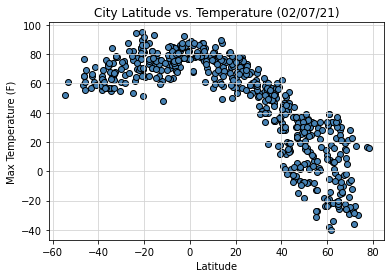

Put in sentences that describe what is being analyzed


In [8]:
#set up scatter plot
x_values = city_data["Lat"]
y_values = city_data["Max Temp"]
plt.scatter(x_values,y_values,edgecolors="black",facecolors="steelblue")
plt.title(f"City Latitude vs. Temperature ({analysis_date})")
plt.xlabel('Latitude')
plt.ylabel('Max Temperature (F)')
plt.grid (b=True,which="major",axis="both",linestyle="-",color="lightgrey")
plt.show()

# describe what's happening
print(f'Put in sentences that describe what is being analyzed')

## Latitude vs. Humidity Plot

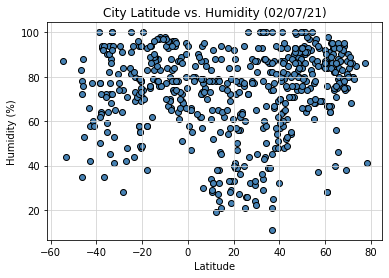

Put in sentences that describe what is being analyzed


In [9]:
#set up scatter plot
x_values = city_data["Lat"]
y_values = city_data["Humidity"]
plt.scatter(x_values,y_values,edgecolors="black",facecolors="steelblue")
plt.title(f"City Latitude vs. Humidity ({analysis_date})")
plt.xlabel('Latitude')
plt.ylabel('Humidity (%)')
plt.grid (b=True,which="major",axis="both",linestyle="-",color="lightgrey")
plt.show()

# describe what's happening
print(f'Put in sentences that describe what is being analyzed')

## Latitude vs. Cloudiness Plot

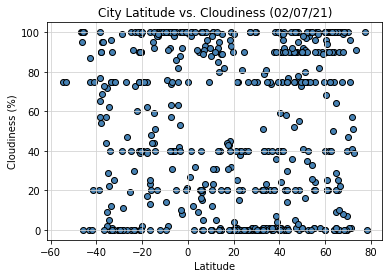

Put in sentences that describe what is being analyzed


In [10]:
#set up scatter plot
x_values = city_data["Lat"]
y_values = city_data["Cloudiness"]
plt.scatter(x_values,y_values,edgecolors="black",facecolors="steelblue")
plt.title(f"City Latitude vs. Cloudiness ({analysis_date})")
plt.xlabel('Latitude')
plt.ylabel('Cloudiness (%)')
plt.grid (b=True,which="major",axis="both",linestyle="-",color="lightgrey")
plt.show()

# describe what's happening
print(f'Put in sentences that describe what is being analyzed')

## Latitude vs. Wind Speed Plot

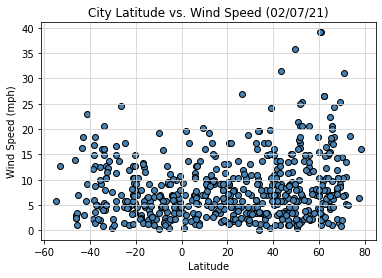

Put in sentences that describe what is being analyzed


In [11]:
#set up scatter plot
x_values = city_data["Lat"]
y_values = city_data["Wind Speed"]
plt.scatter(x_values,y_values,edgecolors="black",facecolors="steelblue")
plt.title(f"City Latitude vs. Wind Speed ({analysis_date})")
plt.xlabel('Latitude')
plt.ylabel('Wind Speed (mph)')
plt.grid (b=True,which="major",axis="both",linestyle="-",color="lightgrey")
plt.show()

# describe what's happening
print(f'Put in sentences that describe what is being analyzed')

## Linear Regression

In [12]:
#get data for each hemisphere
north = city_data.loc[city_data['Lat']>=0, :]
# north.describe()

south = city_data.loc[city_data['Lat']<0, :]
# south.describe()

### Max Temp vs. Latitude by Hemisphere

####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-vlaue is: -0.8649831439810696


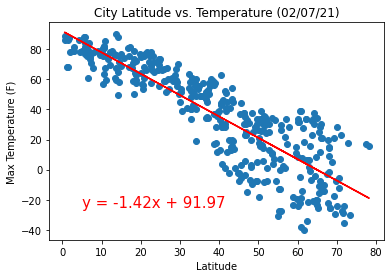

In [13]:
#set up scatter plot
x_values = north["Lat"]
y_values = north["Max Temp"]
plt.scatter(x_values,y_values)
plt.title(f"City Latitude vs. Temperature ({analysis_date})")
plt.xlabel('Latitude')
plt.ylabel('Max Temperature (F)')

# linear regression
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
print(f"The r-vlaue is: {rvalue}")
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(5,-25),fontsize=15,color="red")
plt.show()

####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-vlaue is: 0.5357185511963815


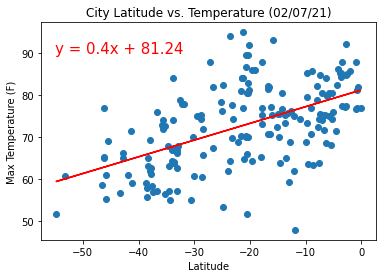

In [14]:
#set up scatter plot
x_values = south["Lat"]
y_values = south["Max Temp"]
plt.scatter(x_values,y_values)
plt.title(f"City Latitude vs. Temperature ({analysis_date})")
plt.xlabel('Latitude')
plt.ylabel('Max Temperature (F)')

# linear regression
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
print(f"The r-vlaue is: {rvalue}")
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(-55,90),fontsize=15,color="red")
plt.show()

<span style = "color:red"> *Description of what is being modeled in the plots above* </span>

### Humidity (%) vs. Latitude by Hemisphere

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-vlaue is: 0.34881508047044935


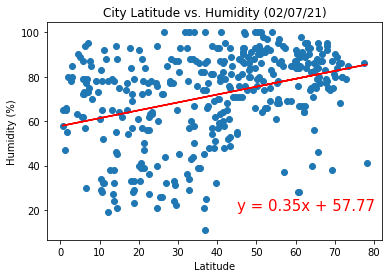

In [15]:
#set up scatter plot
x_values = north["Lat"]
y_values = north["Humidity"]
plt.scatter(x_values,y_values)
plt.title(f"City Latitude vs. Humidity ({analysis_date})")
plt.xlabel('Latitude')
plt.ylabel('Humidity (%)')

# linear regression
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
print(f"The r-vlaue is: {rvalue}")
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(45,20),fontsize=15,color="red")
plt.show()

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-vlaue is: 0.24064565565028048


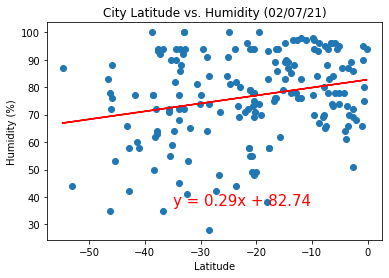

In [16]:
#set up scatter plot
x_values = south["Lat"]
y_values = south["Humidity"]
plt.scatter(x_values,y_values)
plt.title(f"City Latitude vs. Humidity ({analysis_date})")
plt.xlabel('Latitude')
plt.ylabel('Humidity (%)')

# linear regression
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
print(f"The r-vlaue is: {rvalue}")
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(-35,37),fontsize=15,color="red")
plt.show()

<span style = "color:red"> *Description of what is being modeled in the plots above* </span>

### Cloudiness (%) vs. Latitude by Hemisphere

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-vlaue is: 0.14800764998217147


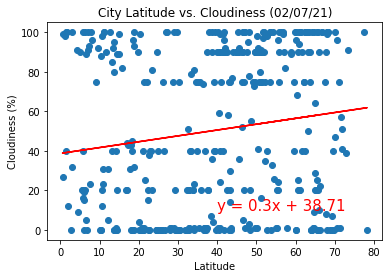

In [17]:
#set up scatter plot
x_values = north["Lat"]
y_values = north["Cloudiness"]
plt.scatter(x_values,y_values)
plt.title(f"City Latitude vs. Cloudiness ({analysis_date})")
plt.xlabel('Latitude')
plt.ylabel('Cloudiness (%)')

# linear regression
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
print(f"The r-vlaue is: {rvalue}")
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(40,10),fontsize=15,color="red")
plt.show()

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-vlaue is: 0.17672785169268984


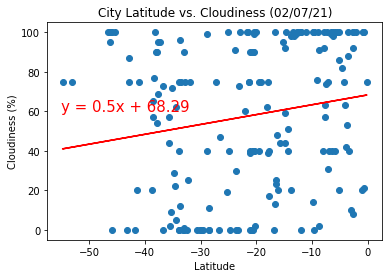

In [18]:
#set up scatter plot
x_values = south["Lat"]
y_values = south["Cloudiness"]
plt.scatter(x_values,y_values)
plt.title(f"City Latitude vs. Cloudiness ({analysis_date})")
plt.xlabel('Latitude')
plt.ylabel('Cloudiness (%)')

# linear regression
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
print(f"The r-vlaue is: {rvalue}")
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(-55,60),fontsize=15,color="red")
plt.show()

<span style = "color:red"> *Description of what is being modeled in the plots above* </span>

### Wind Speed (mph) vs. Latitude by Hemisphere

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-vlaue is: 0.18586456382724717


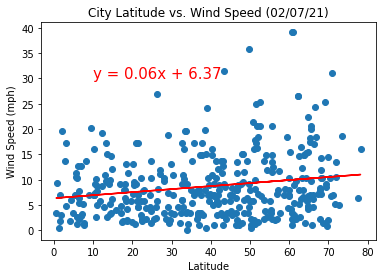

In [19]:
#set up scatter plot
x_values = north["Lat"]
y_values = north["Wind Speed"]
plt.scatter(x_values,y_values)
plt.title(f"City Latitude vs. Wind Speed ({analysis_date})")
plt.xlabel('Latitude')
plt.ylabel('Wind Speed (mph)')

# linear regression
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
print(f"The r-vlaue is: {rvalue}")
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(10,30),fontsize=15,color="red")
plt.show()

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-vlaue is: -0.252474420442794


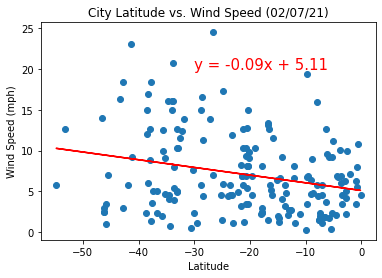

In [21]:
#set up scatter plot
x_values = south["Lat"]
y_values = south["Wind Speed"]
plt.scatter(x_values,y_values)
plt.title(f"City Latitude vs. Wind Speed ({analysis_date})")
plt.xlabel('Latitude')
plt.ylabel('Wind Speed (mph)')

# linear regression
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
print(f"The r-vlaue is: {rvalue}")
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(-30,20),fontsize=15,color="red")
plt.show()

<span style = "color:red"> *Description of what is being modeled in the plots above* </span>